In [15]:
#IMPORTS
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.utils import shuffle
from google.colab import drive
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Beatles"
!ls

#LOAD IMAGES
john_folder = 'john'
paul_folder = 'paul'
george_folder = 'george'
ringo_folder = 'ringo'
image_size = (160, 160)

John_images = []
Paul_images = []
George_images = []
Ringo_images = []


def preprocess(folder_name):
  temp = []
  for filename in os.listdir(folder_name):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
          img_path = os.path.join(folder_name, filename)
          img = load_img(img_path, target_size=image_size)
          img_array = img_to_array(img) / 255
          temp.append(img_array)

  temp = np.array(temp)
  return shuffle(temp)

John_images= preprocess(john_folder)
Paul_images = preprocess(paul_folder)
George_images = preprocess(george_folder)
Ringo_images = preprocess(ringo_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Beatles
george	john  paul  ringo


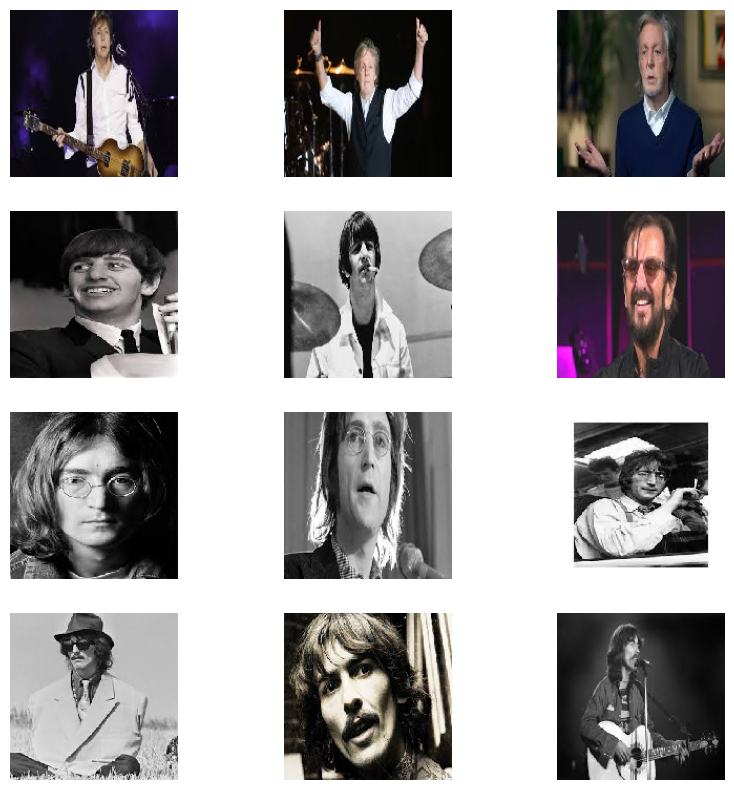

In [35]:
#SPLIT 80 - 20
ringo_train, ringo_test, = train_test_split(Ringo_images ,test_size=0.20, random_state=42)
george_train, george_test, = train_test_split(George_images ,test_size=0.20, random_state=42)
paul_train, paul_test, = train_test_split(Paul_images ,test_size=0.20, random_state=42)
john_train, john_test, = train_test_split(John_images ,test_size=0.20, random_state=42)

f, axarr = plt.subplots(4, 3, figsize=(10, 10))

for i in range(3) :
  axarr[0][i].imshow(paul_train[i])
  axarr[1][i].imshow(ringo_train[i])
  axarr[2][i].imshow(john_train[i])
  axarr[3][i].imshow(george_train[i])
  axarr[0][i].axis('off')
  axarr[1][i].axis('off')
  axarr[2][i].axis('off')
  axarr[3][i].axis('off')
plt.show()